In [2]:
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import hypertools as hyp
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [3]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
data.columns[50]

'zr_ppm'

In [101]:
X = data.iloc[0:, 0:50].values

In [102]:
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

y = data.iloc[0:,80:].values #train data for multilabel problem
#y = data.HUC_12
#lb.fit(y)
#y_transformed=lb.transform(y)
ybinarized = Binarizer().fit_transform(y)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ybinarized, test_size=0.1, random_state=86)

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_similarity_score


In [75]:
#multi class learner predicting on HUC_12 to classify location based on geochemistry
scores0=[]
for i in range(1,50):
    clf=ExtraTreesClassifier(n_estimators=5, max_features=51, n_jobs=-1)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores0.append(accuracy_score(y_test.astype(int), preds, normalize=True))

KeyboardInterrupt: 

In [111]:
clf=ExtraTreesClassifier(n_estimators=50, max_features=50, n_jobs=3)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
hamming_loss(y_test.astype(int), preds)

0.02744532326057014

In [23]:
plt.plot(score)

NameError: name 'score' is not defined

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_similarity_score

clf=RandomForestClassifier(n_estimators=50, max_features=50, n_jobs=-1)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
jaccard_similarity_score(y_test.astype(int), preds, normalize=True)

0.3076869564599684

In [ ]:
plt.plot(y)

In [11]:
#clf=KNeighborsClassifier(n_neighbors=i, weights='uniform')
#clf=ExtraTreesClassifier(n_estimators=i, max_features=30)

scores=[]
for i in range(1,20,5):
    clf=ExtraTreesClassifier(n_estimators=i, max_features=30)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores.append(accuracy_score(y_test.astype(int), preds, normalize=True))
    

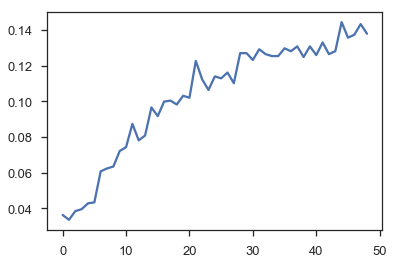

In [11]:
plt.plot(scores0)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        preds[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], preds[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    preds.ravel())
average_precision["micro"] = average_precision_score(y_test, preds,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.68


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.68')

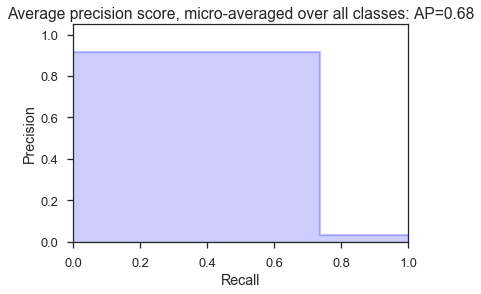

In [19]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), preds, normalize=True)

0.3336950623982637

In [146]:
from sklearn.model_selection import GridSearchCV

In [157]:
etc=ExtraTreesClassifier()
parameters={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50], 'max_features':[1,5,10,15,20,25,30,35,45,50]}

In [158]:
clf=GridSearchCV(etc, parameters)

In [159]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [1, 5, 10, 15, 20, 25, 30, 35, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
tuned=clf.fit(X_train, y_train.astype(int))

In [161]:
tuned_predictions=tuned.predict(X_test)

In [164]:
accuracy_score(y_test.astype(int), tuned_predictions, normalized=False)

1038

In [172]:
tuned.results()

AttributeError: 'GridSearchCV' object has no attribute 'results'

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [110]:
nn=Sequential()
nn.add(Dense(10, activation='softmax', input_shape=(51,)))
nn.add(Dropout(0.8))
nn.add(Dense(1, activation='sigmoid'))

#nn.add(Dropout(0.2))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.1))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.3))


In [111]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_crossentropy'])

In [112]:
from keras import utils
dummy_y = utils.to_categorical(y_train)

In [113]:
dummy_y.shape


(14736, 2175)

In [114]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, validation_data=(X_test, y_test), shuffle=True,
              verbose=0)

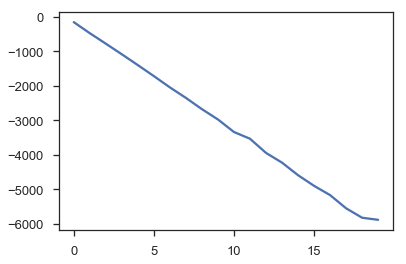

In [115]:
plt.plot(history.history['loss'])

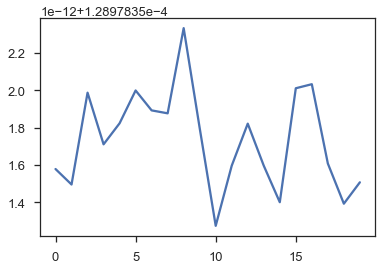

In [117]:
plt.plot(history.history['categorical_crossentropy'])

In [118]:
neural=nn.predict(X_test)
neural[0]


array([0.99667454], dtype=float32)

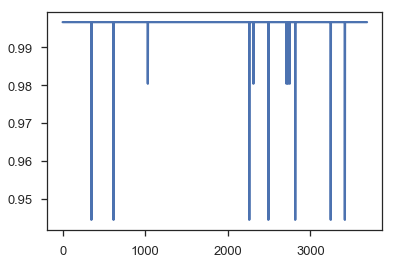

In [119]:
nbin = Binarizer(threshold=0.05).fit_transform(neural)
plt.plot(neural)


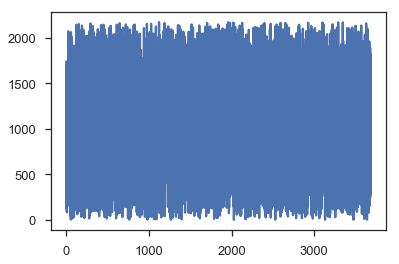

In [100]:
plt.plot(y_test)

In [101]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=30)

# train
classifier.fit(X_train, y_train)

# predict
predictions = np.asarray(classifier.predict(X_test).todense())


IndexError: Index (0) out of range -1 to 0.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i,:],
                                                        predictions[i,:])
    average_precision[i] = average_precision_score(y_test[i,:], predictions[i,:])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

# Calculating Probabilities

In [ ]:
'''
number of counts of a formation where the element value is in some range
divde that number by the total count of the formation = P(Formation|Element)

number of counts of element in some range divided by total number of counts P(Element)

number of counts of formation divided by total number of counts P(Formation)
'''

In [4]:
import itertools
from numba import autojit
#@autojit
#def newList(a, b, b1):
    #return list(itertools.product(a, b, b1))
start=time.time()
a = data.columns[0:50]
b = data.columns[80:]
b1 = data.HUC_12.unique()
c = list(itertools.product(a, b, b1))

#newList(a, b, b1)
end=time.time()
print(end-start)

3.1678261756896973


In [ ]:
import time
start=time.time()

chunk=np.linspace(0,1000000,5)
for k in range(0,4):
        
    fullDF=pd.DataFrame(columns=['bins_ppm', 'formation', 'HUC_12', 'prob', 'element'])

    for i in tqdm(range(chunk[k].astype(int), chunk[k+1].astype(int))):
        pre=[]
        d3=data[data['HUC_12']==c[i][2]][[c[i][0], c[i][1]]]
        bins=np.percentile(data[c[i][0]], [25, 50, 75, 100])
        testDF = pd.DataFrame()

        if d3.iloc[0:,1].sum()>0:
            for j in range(len(bins)):
                try:
                    FmEl = d3[(d3.iloc[0:,1]>0) & (d3.iloc[0:,0].between(bins[j],bins[j+1], 
                            inclusive=True))].shape[0]/d3[d3.iloc[0:,0].between(bins[j],bins[j+1], inclusive=True)].shape[0]
                    El = d3[d3.iloc[0:,0].between(bins[j],bins[j+1], inclusive=True)].shape[0]/d3.shape[0]
                    Fm = d3[(d3.iloc[0:,1]>0)].shape[0]/d3.shape[0]
                    pre.append((FmEl*El)/Fm)
                except:
                    pre.append(0)
            testDF = pd.DataFrame()
            testDF['bins_ppm'] = bins
            testDF['formation'] = d3.columns[1]
            testDF['HUC_12'] = c[i][2]
            testDF['HUC_12']=testDF['HUC_12'].astype(str)
            testDF['prob'] = pre
            testDF['element'] = c[i][0]
        else:
            pass
        fullDF = pd.concat([fullDF, testDF])
    file_name = str(chunk[k+1].astype(int))+".csv"
    DF2=fullDF.dropna()
    DF2.to_csv(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\probability maps\\'+file_name)

    
end=time.time()
print(end-start)

 52%|████████████████████████████████████▋                                 | 131160/250000 [09:36<08:42, 227.63it/s]

In [23]:
huc8=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc8= huc8.to_crs({'init': 'epsg:3732'})


In [24]:
CaptainHucstable = huc8.merge(fullDF, on='HUC_12' )

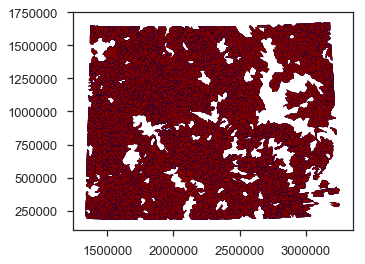

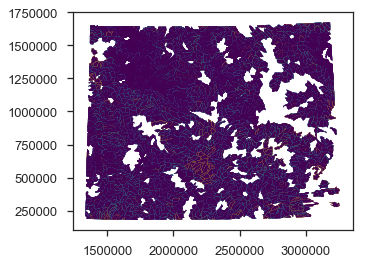

In [25]:
CaptainHucstable.plot(column='bins_ppm', cmap='seismic')
CaptainHucstable.plot(column='prob', cmap='viridis')

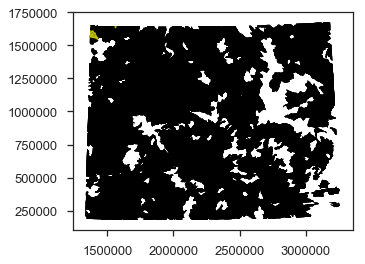

In [45]:
ax=CaptainHucstable.plot(color='k')
CaptainHucstable[(CaptainHucstable['prob']>0.5) & (CaptainHucstable['bins_ppm']>0.2) &
                 (CaptainHucstable['formation']==CaptainHucstable['formation'].unique()[0])].plot(color='y', ax=ax)


In [42]:
CaptainHucstable['formation'].unique()[0]

'Absaroka Volcanic Supergroup: Sunlight Group - Trout Peak Trachyandesite, Wapiti Formation, Crescent Hill Basalt, and Mount Wallace Formation'

In [45]:
import hypertools as hyp
%matplotlib notebook


<IPython.core.display.Javascript object>


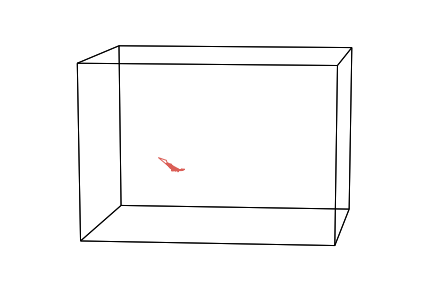

In [48]:
hyp.plot(data.iloc[0:,0:50], animate=True, normalize='across')

<IPython.core.display.Javascript object>


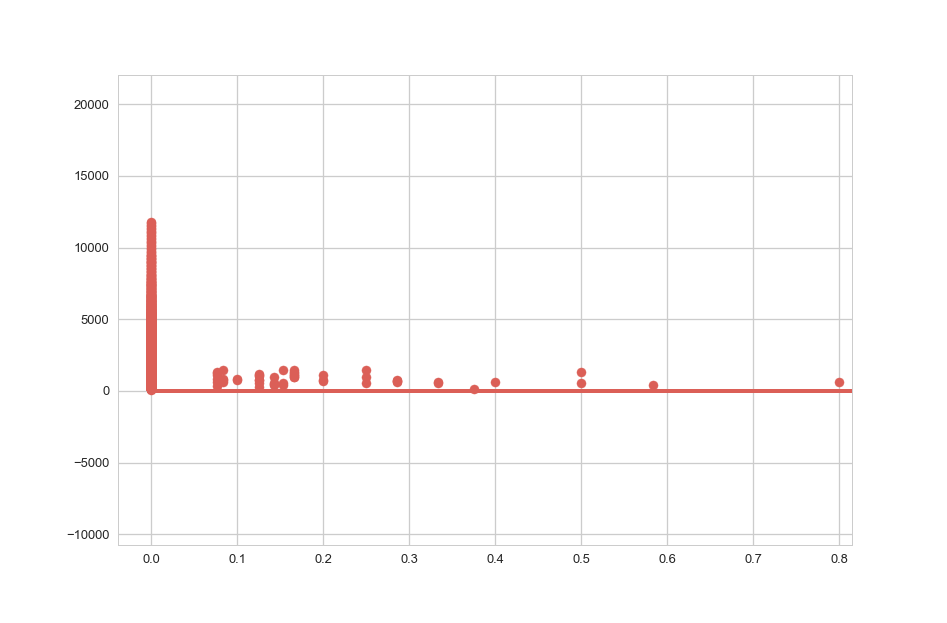

In [56]:
plt.scatter(hucProbability.probability, hucProbability.conc_ppm)

In [12]:
np.percentile(data.iloc[0:, 0],[25, 50, 75, 100])

array([  2.7,   3.2,   4. , 248.8])